# Some Fun with Numba
<a href="https://mybinder.org/v2/gh/mpi-astronomy/FAQ/d8f8b6f7d8ef129e5e7e71a7a1fa986970f336cb" 
   target="_blank">
   <img align="left" 
      src="https://mybinder.org/badge_logo.svg">
</a>
<a href="https://nbviewer.org/github/mpi-astronomy/FAQ/blob/main/coding/NumbaFun.ipynb" 
   target="_blank">
   <img align="right" 
      src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.png" 
      width="109" height="20">
</a>

This is a notebook to demonstrate `numba` following this article:
https://pythonspeed.com/articles/numba-faster-python/

The example is a simple function which takes an array and calculates the monotonically increasing version:
```
[1, 2, 1, 3, 3, 5, 4, 6] → [1, 2, 2, 3, 3, 5, 5, 6]
```

In [1]:
#!pip install numpy
#!pip install numba

In [2]:
import numpy as np
from numba import njit

Let's create a function that does the work we need

In [3]:
# Defining a regular function
def monotonically_increasing(a):
     max_val = 0
     for i in range(len(a)):
         if a[i] > max_val:
             max_val = a[i]
         a[i] = max_val
     return a

In [4]:
# Defining the numba decorated function
@njit
def numba_monotonically_increasing(a):
     max_val = 0
     for i in range(len(a)):
         if a[i] > max_val:
             max_val = a[i]
         a[i] = max_val
     return a

```{tip}
you can use `result = %timeit -o` to record the execution time
```

In [5]:
# Let's check performance
# First run regular function:
time_numpy_1 = %timeit -o monotonically_increasing(np.random.randint(0, 1000000, 1000000))

192 ms ± 24.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
# Second run regular function:
time_numpy_2 = %timeit -o monotonically_increasing(np.random.randint(0, 1000000, 1000000))

169 ms ± 8.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
# Third run regular function:
time_numpy_3 = %timeit -o monotonically_increasing(np.random.randint(0, 1000000, 1000000))

167 ms ± 9.44 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Duration of execution is the same.

In [8]:
# First run numba function:
time_numba_1 = %timeit -o numba_monotonically_increasing(np.random.randint(0, 1000000, 1000000))

4.6 ms ± 323 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
# Second run numba function:
time_numba_2 = %timeit -o numba_monotonically_increasing(np.random.randint(0, 1000000, 1000000))

4.68 ms ± 263 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
# Third run numba function:
time_numba_3 = %timeit -o numba_monotonically_increasing(np.random.randint(0, 1000000, 1000000))

4.56 ms ± 66.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


First run is much slower (function is compiled) but subsequent runs are ~14 times faster!

Woah! For a sample run the first took 162 ms, while the second took 4.5 seconds on average.

In [11]:
264/9.64

27.38589211618257

~27 times faster!!!

Note: the actual execution times will vary depending on the underlying system and the type of problem you are solving.

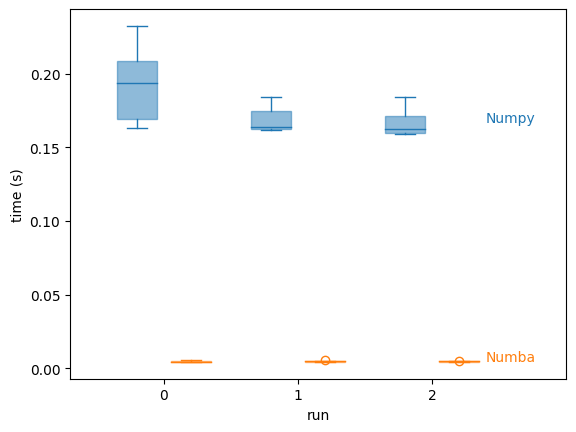

In [14]:
import matplotlib.pyplot as plt

# plot times from timeit outputs
data = [run.timings for run in (time_numpy_1, time_numpy_2, time_numpy_3)]
pos = np.arange(len(data))
c = 'C0'
plt.boxplot(data, positions=pos - 0.2, 
            patch_artist=True,
            boxprops=dict(facecolor=c, color=c, alpha=0.5),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c))
plt.text(pos[-1] + 0.4, np.mean(data[-1]), f'Numpy',
         color=c, weight='roman', ha='left')

data = [run.timings for run in (time_numba_1, time_numba_2, time_numba_3)]
pos = np.arange(len(data))
c = 'C1'
plt.boxplot(data, positions=pos + 0.2, 
            patch_artist=True,
            boxprops=dict(facecolor=c, color=c, alpha=0.5),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c))

plt.text(pos[-1] + 0.4, np.mean(data[-1]), f'Numba',
         color=c, weight='roman', ha='left')

plt.xlim(plt.xlim()[0], plt.xlim()[1] + 0.3)
plt.xticks(pos, pos)
plt.ylabel('time (s)')
plt.xlabel('run');
